# <p style="text-align: center;">Week 4 Assignment</p>
# EDA analysis on NYC trip duration dataset

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#dataset loading
data=pd.read_csv("nyc_taxi_trip_duration.csv")
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [4]:
data.shape

(729322, 11)

In [5]:
#finding the columns present in the dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
#identifying the types of dataset columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#finding no of missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
#finding unique enteries in each column
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [9]:
#finding the count of categorical variables
data["vendor_id"].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [10]:
#finding the count of categorical variables
data["store_and_fwd_flag"].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [12]:
#converting datetime from object type to datetime type
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [13]:
#spliting datetime into day,month and hours
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [14]:
#iNVOKING new column to identify the part of the day
def timezone(x):
    if x in range(5,8):
        return 'Morning'
    if x in range(8,12):
        return 'Morning-Peakhours'
    elif x in range(12,15) :
        return 'Afternoon'
    elif x in range(15,18):
        return 'Evening'
    elif x in range(18,22):
        return 'Night'
    else:
        return 'Late Night'
    
data['pickup_timezone']=data['pickup_hour'].apply(timezone)


In [15]:
data['dropoff_timezone']=data['dropoff_hour'].apply(timezone)

In [38]:
!pip install geopy

     ------------------------------------ 119.8/119.8 kB 637.1 kB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00


In [16]:
#finding the distance traved using latitude and longitude points
from geopy.distance import great_circle
def distance(p_lat,p_long,d_lat,d_long):
    start_coordinates=(p_lat,p_long)
    stop_coordinates=(d_lat,d_long)
    return great_circle(start_coordinates,stop_coordinates).km
data['distance'] = data.apply(lambda x: distance(x['pickup_latitude'],x['pickup_longitude'],
                                                 x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [17]:
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23,23,3,3,Late Night,Late Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17,18,2,2,Evening,Night,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,9,10,1,1,Morning-Peakhours,Morning-Peakhours,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,6,6,2,2,Morning,Morning,4.328540


In [18]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
pickup_day                 7
dropoff_day                7
pickup_hour               24
dropoff_hour              24
pickup_month               6
dropoff_month              7
pickup_timezone            6
dropoff_timezone           6
distance              726243
dtype: int64

In [19]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timezone               object
dropoff_timezone              object
distance                     float64
dtype: object

In [20]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,13.611698,13.60616,3.518410,3.518764,3.441144
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,6.402853,6.48637,1.680661,1.680815,4.353138
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.00000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,9.000000,9.00000,2.000000,2.000000,1.232697
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,14.000000,14.00000,4.000000,4.000000,2.095675
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,19.000000,19.00000,5.000000,5.000000,3.876487
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,23.000000,23.00000,6.000000,7.000000,1240.910430


# Univariate Analysis


<Axes: xlabel='passenger_count', ylabel='count'>

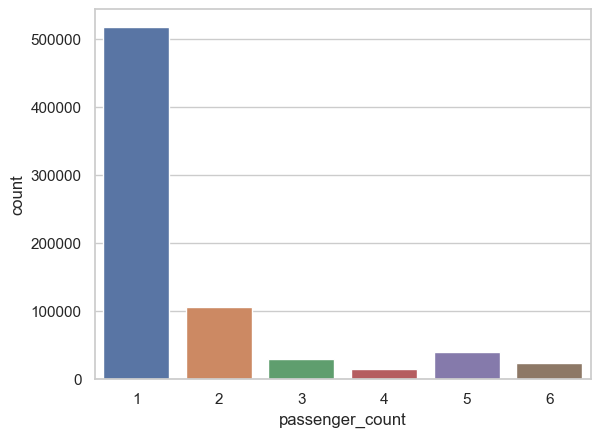

In [88]:
#identifying the count of no of passengers involved in each trip
import warnings
warnings.simplefilter('ignore')
sns.countplot(x="passenger_count",data=data)

In [33]:
#since passengers above 6 and zero passengers dont involve in taxi trip drop the rows where count is 0 or greqater than 6
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]
data['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

<Axes: xlabel='store_and_fwd_flag', ylabel='count'>

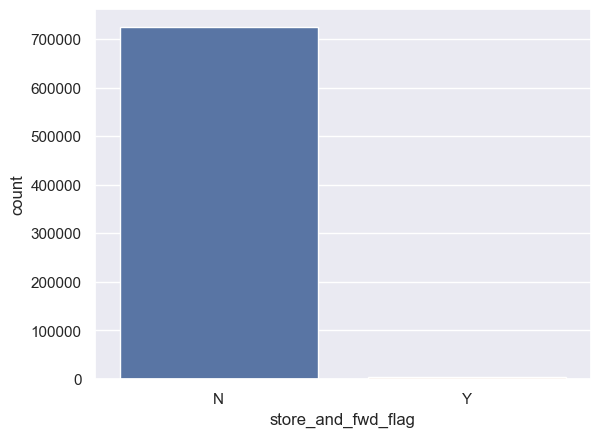

In [114]:
#identifying the count of flag count for each trip
sns.countplot(x="store_and_fwd_flag",data=data)

In [180]:
data["store_and_fwd_flag"].value_counts(normalize=True)
#since Y has just 0.5% value it indicates that the trip record was held in vehicle memory before sending to the vendor

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

<Axes: >

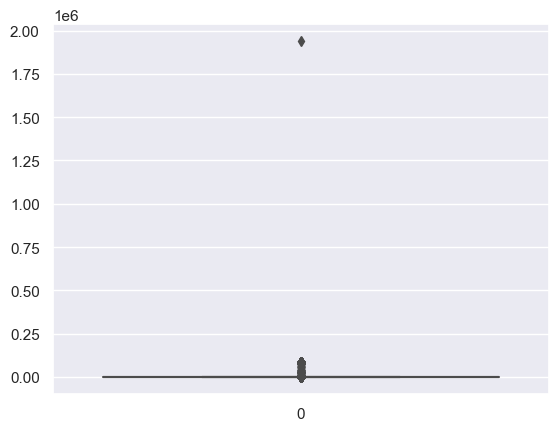

In [116]:
#identifying the distribution of trip duration
sns.boxplot(data["trip_duration"])

In [117]:
data['trip_duration'].sort_values(ascending=False)


21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
323299          1
102646          1
566349          1
398887          1
512833          1
Name: trip_duration, Length: 729287, dtype: int64

<Axes: ylabel='trip_duration'>

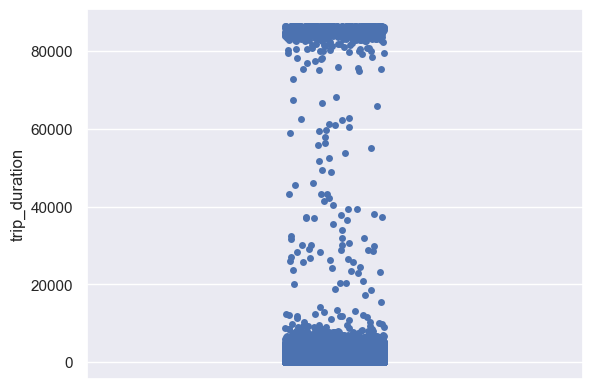

In [32]:
#since only 1939736 value remains as a outlier just eliminate them
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)
sns.stripplot(y=data['trip_duration'])

<Axes: xlabel='vendor_id', ylabel='count'>

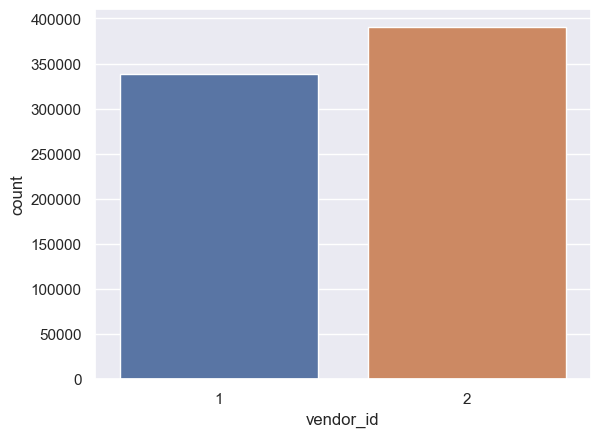

In [128]:
#identifying the count of trips where each vendor is involved
sns.countplot(x='vendor_id',data=data)
#from the graph we understood that usually vendor 2 involves in more trips

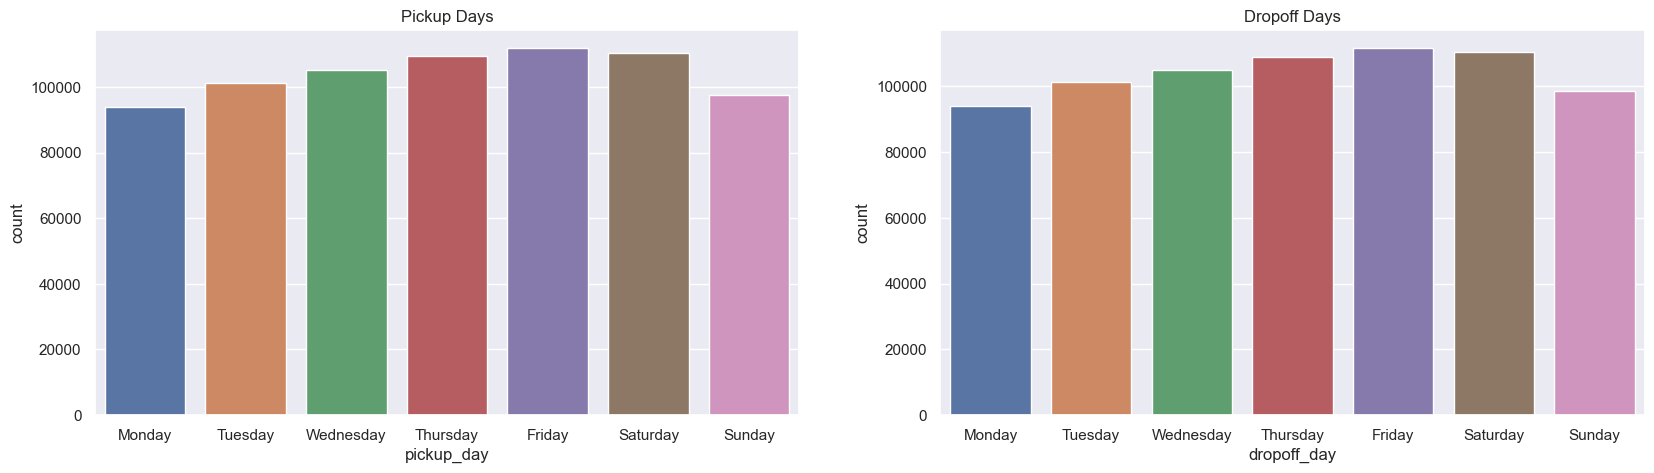

In [188]:
#identifying which day has more taxi trip
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday",
                                       "Sunday"],data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday",
                                       "Sunday"],data=data,ax=ax2)
#from the graph we identify friday has more no of trips

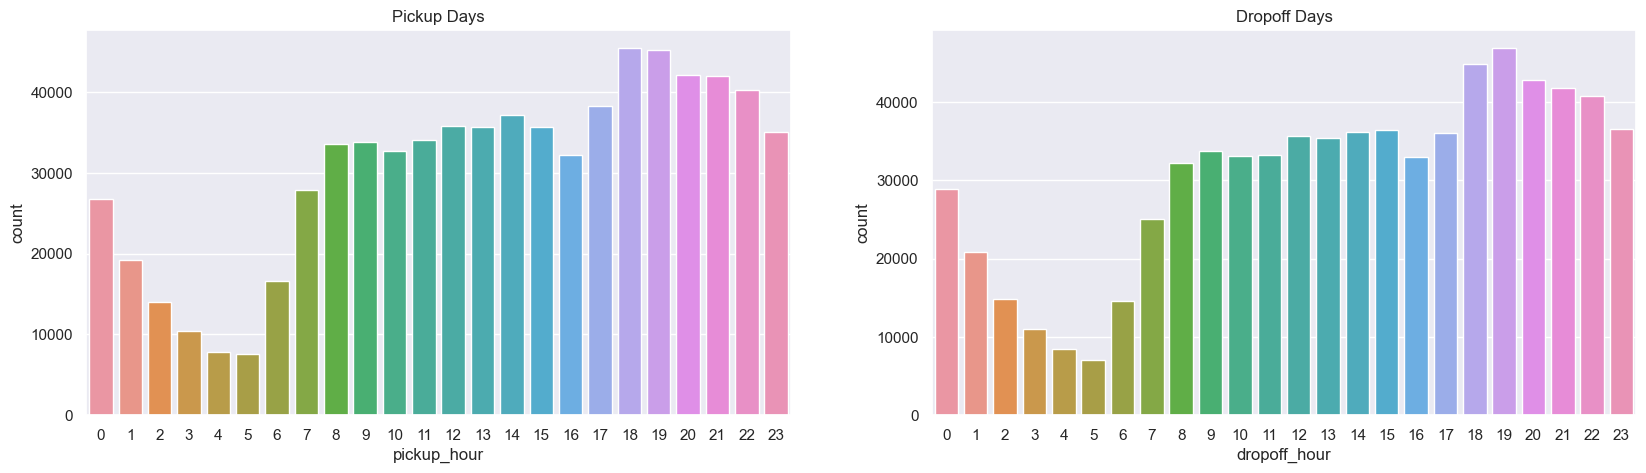

In [190]:
#identifying the time which has more taxi trip
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)
#from the graph we identify the time interval of 6pm to 7pm has more no of trips which indicates people use more taxi to return from their office

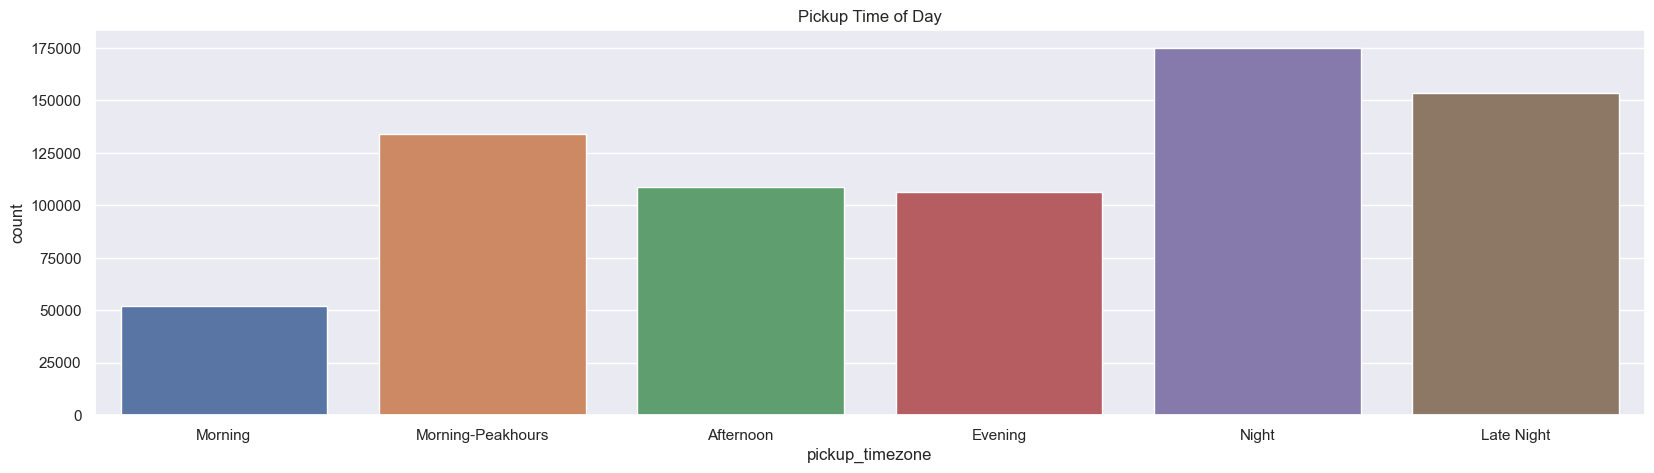

In [183]:
#identifying which part of day has more taxi trip
figure,(ax5)=plt.subplots(figsize=(20,5))
ax5.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timezone",order=["Morning","Morning-Peakhours","Afternoon","Evening","Night",
                                            "Late Night"],data=data,ax=ax5)


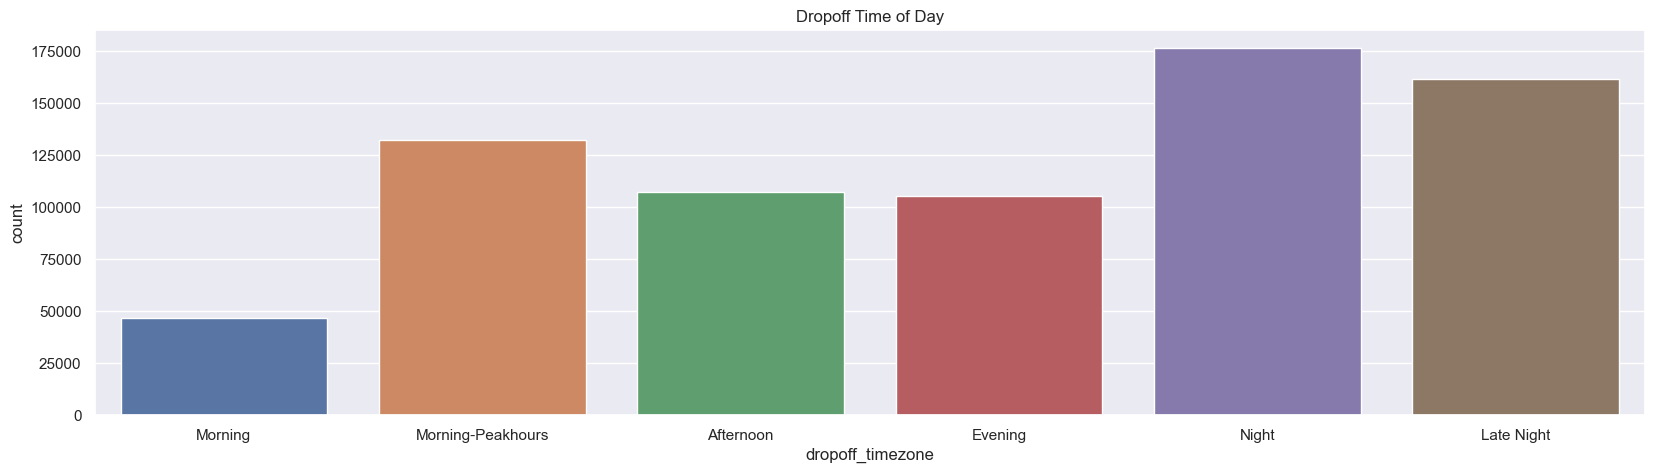

In [185]:

figure,(ax6)=plt.subplots(figsize=(20,5))
ax6.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timezone",order=["Morning","Morning-Peakhours","Afternoon","Evening","Night",
                                            "Late Night"],data=data,ax=ax6)
#from the graph we identify night time has more no of trips

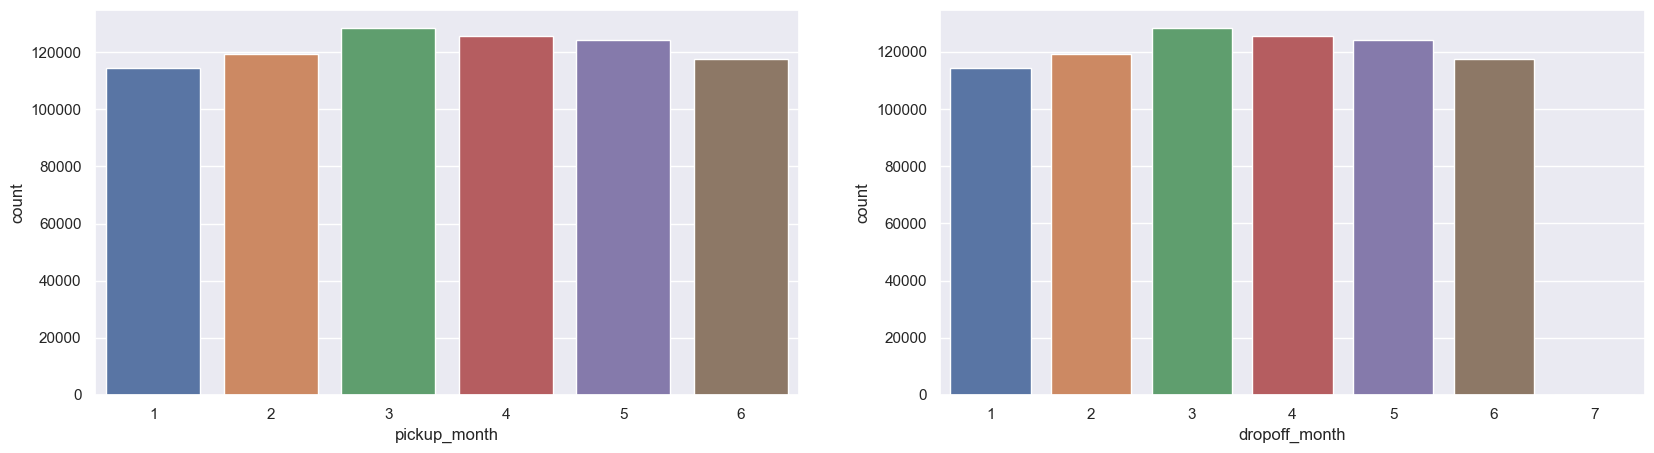

In [160]:
#identifying which month has more taxi trip
figure,(ax7,ax8)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax7)
ax10.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax8)

In [161]:
data[data["dropoff_month"]==7]
#this dataset indicates that some trips started at last day of the june month and ended at the 1st day of july

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone,distance
7618,id1348366,2,2016-06-30 23:50:24,2016-07-01 00:22:26,1,-73.990891,40.748520,-74.003799,40.713242,N,1922,Thursday,Friday,23,0,6,7,Late Night,Late Night,4.070789
46863,id3674376,1,2016-06-30 23:57:49,2016-07-01 00:07:41,2,-73.863701,40.769588,-73.911179,40.767735,N,592,Thursday,Friday,23,0,6,7,Late Night,Late Night,4.003593
52113,id3472385,1,2016-06-30 23:38:14,2016-07-01 00:30:28,2,-73.789925,40.647015,-73.950760,40.783241,N,3134,Thursday,Friday,23,0,6,7,Late Night,Late Night,20.327423
58716,id3367503,2,2016-06-30 23:05:59,2016-07-01 23:02:03,2,-73.984352,40.780006,-73.982689,40.771656,N,86164,Thursday,Friday,23,23,6,7,Late Night,Late Night,0.939023
59196,id1594952,1,2016-06-30 23:46:26,2016-07-01 00:16:24,1,-73.989235,40.729237,-73.934723,40.753731,N,1798,Thursday,Friday,23,0,6,7,Late Night,Late Night,5.339441
65165,id0694522,1,2016-06-30 23:53:18,2016-07-01 00:23:10,1,-74.006165,40.739918,-73.944687,40.803139,N,1792,Thursday,Friday,23,0,6,7,Late Night,Late Night,8.730451
74857,id2871095,1,2016-06-30 23:48:02,2016-07-01 00:06:02,1,-73.976807,40.788284,-73.991035,40.736801,N,1080,Thursday,Friday,23,0,6,7,Late Night,Late Night,5.848760
86869,id1230274,2,2016-06-30 08:00:53,2016-07-01 07:46:38,4,-73.922516,40.771847,-73.776398,40.645748,N,85545,Thursday,Friday,8,7,6,7,Morning-Peakhours,Morning,18.662627
89886,id2610717,2,2016-06-30 23:38:45,2016-07-01 00:06:56,1,-73.789368,40.647141,-73.927887,40.766499,N,1691,Thursday,Friday,23,0,6,7,Late Night,Late Night,17.677040
99100,id0937552,2,2016-06-30 20:28:41,2016-07-01 20:17:00,1,-73.983688,40.738144,-73.988121,40.759678,N,85699,Thursday,Friday,20,20,6,7,Night,Night,2.423411


In [162]:
data['distance'].value_counts()

0.000000    2889
0.000424      19
0.000424      19
0.000424      16
0.000424      11
            ... 
0.977650       1
0.925223       1
4.112012       1
1.107789       1
5.945846       1
Name: distance, Length: 726210, dtype: int64

<Axes: ylabel='distance'>

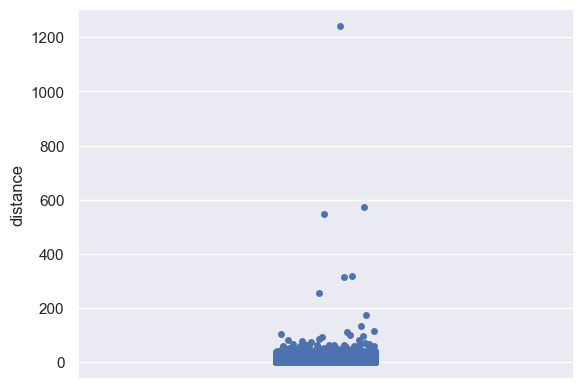

In [170]:

#understanding the distribution of distance
sns.stripplot(y=data['distance'])

<Axes: ylabel='distance'>

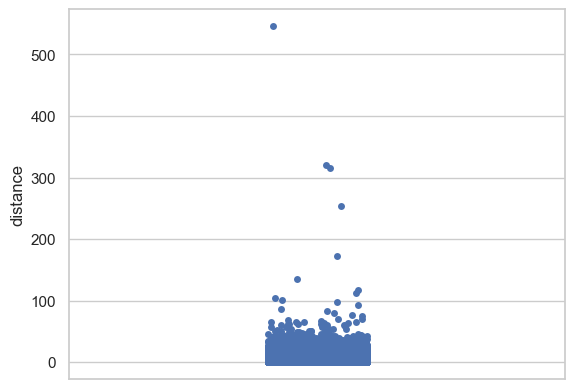

In [94]:
#since outlier is found we can remove them
data.drop(data[data['distance']==data['distance'].max()].index,inplace=True)
sns.stripplot(y=data['distance'])

# Bivariate analysis


<Axes: xlabel='vendor_id', ylabel='trip_duration'>

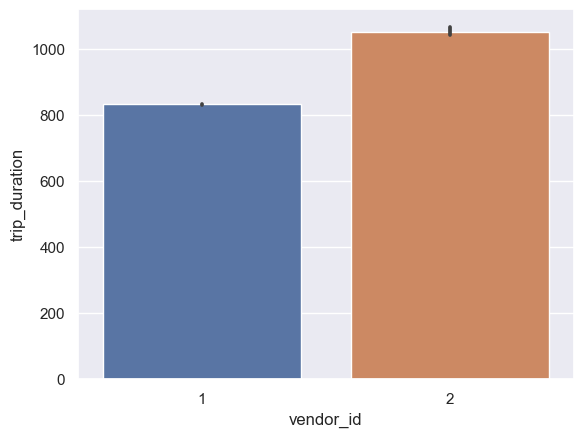

In [191]:
#trip duration per vendor
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)
#the graph indicates that vendor 2 always involved in bigger duration trips

<Axes: xlabel='vendor_id', ylabel='distance'>

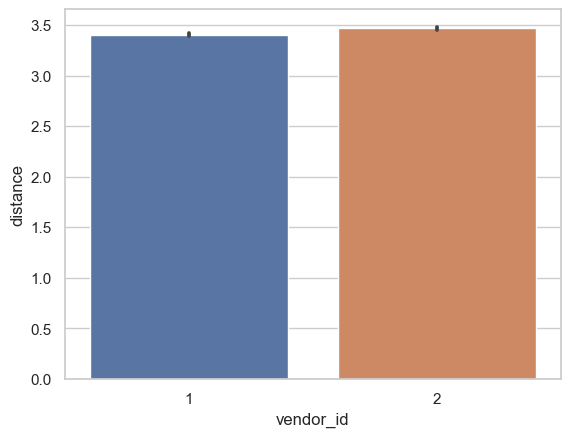

In [95]:
#Distance and Vendor
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)
#from the graph we conclude that both vendors travel similar distance but wrt duration vs vendor graph, we can conclude that 
#vendor 1 travels more faster than vendor 2

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

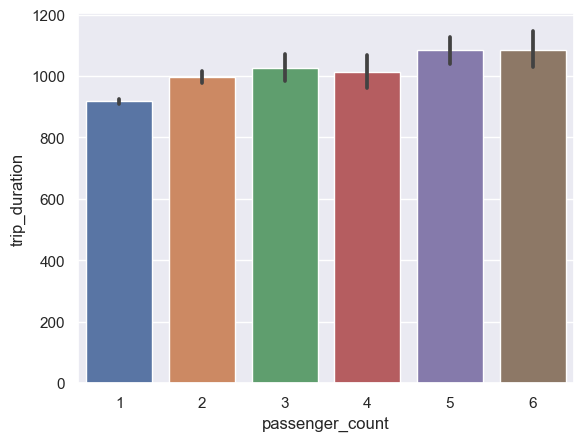

In [206]:
#trip duration vs passenger count
sns.barplot(x='passenger_count',y='trip_duration',data=data)
#from the graph we understand that passenger with 5 and 6 members are always involved in more duration rides

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

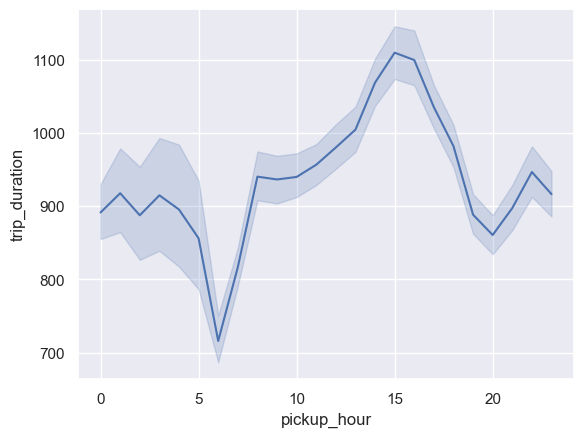

In [207]:
#Trip Duration per hour(Pickup timings)
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)
#trip duration is usually more at 3 pm due to traffic and minimum at 6 am indicating less traffic

<Axes: xlabel='pickup_hour', ylabel='distance'>

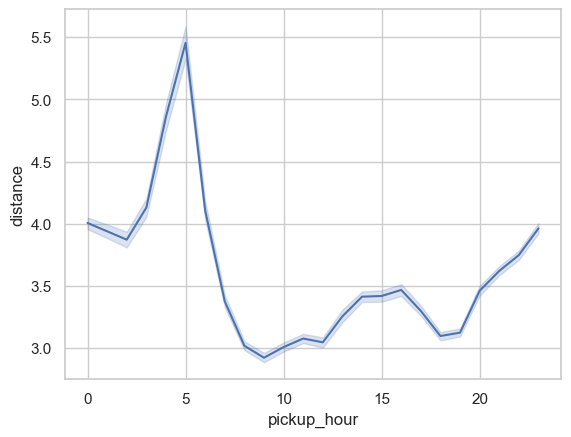

In [96]:
#Distance per hour of day
sns.lineplot(x='pickup_hour',y='distance',data=data)
#from the graph above and below we find people are willing to travel more around 5am (early morning) inorder to prevent traffic


<Axes: xlabel='pickup_timezone', ylabel='trip_duration'>

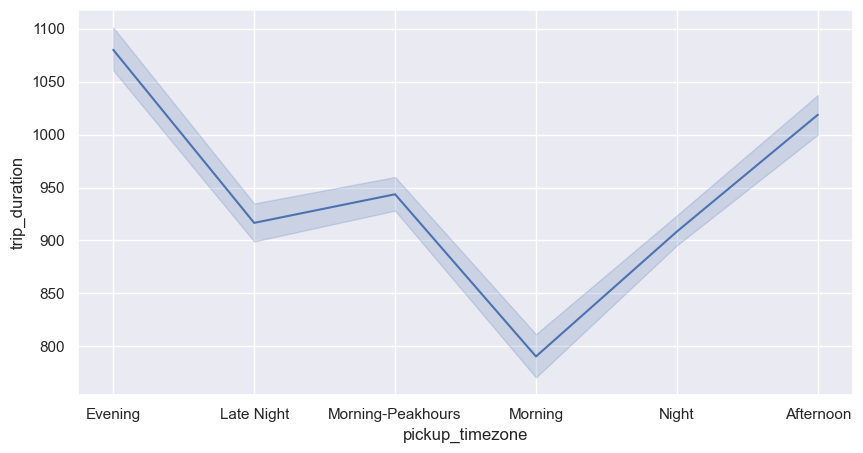

In [215]:
#Trip Duration per time of day
figure=plt.subplots(figsize=(10,5))
sns.lineplot(x='pickup_timezone',y='trip_duration',data=data)
#from the graph we understand that trip duration is high on evening indicating employees use taxi while returning from companies

<Axes: xlabel='pickup_timezone', ylabel='distance'>

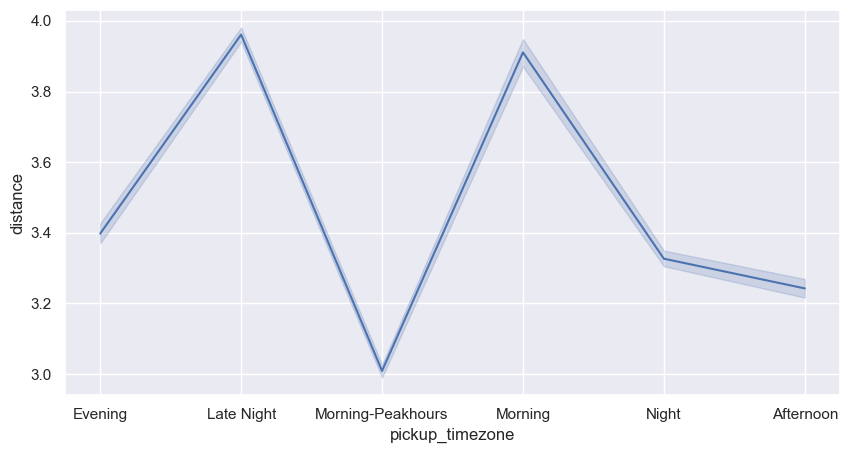

In [224]:
#Distance per time of day
figure=plt.subplots(figsize=(10,5))
sns.lineplot(x='pickup_timezone',y='distance',data=data)
#from the graph above and below we find people are willing to travel more in late night andearly morning
#inorder to prevent traffic

<Axes: xlabel='pickup_day', ylabel='trip_duration'>

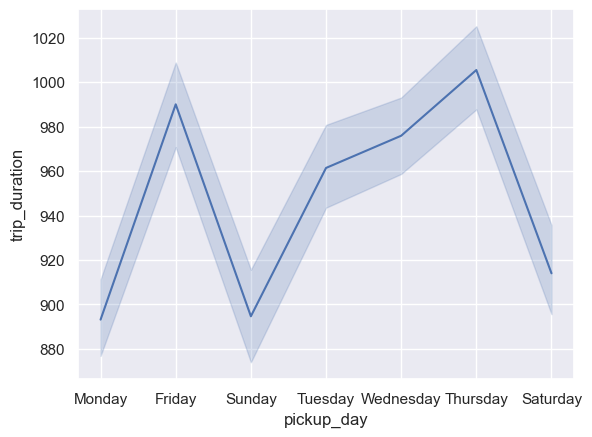

In [212]:
#Trip Duration per Day of Week
sns.lineplot(x='pickup_day',y='trip_duration',data=data)
#from the graph we identify thursday and friday usually have more trip duraation and sunday has less trip duration indicating
#holiday

<Axes: xlabel='pickup_day', ylabel='distance'>

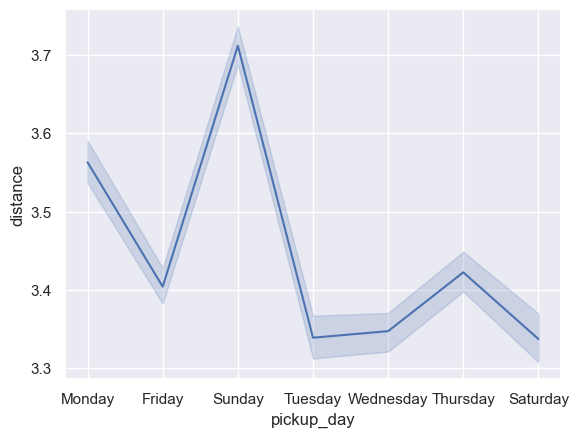

In [220]:
#Distance per day of week
sns.lineplot(x='pickup_day',y='distance',data=data)
#sundays usually travel more distance than other days but from duration vs day graph we can find that duration foer those distance
#travelled is less indicating there is huge traffic reduction on sunday

<Axes: xlabel='pickup_month', ylabel='trip_duration'>

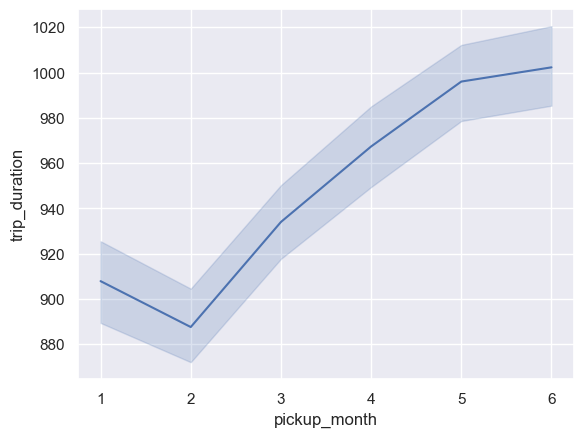

In [216]:
#Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=data)
#graph indicates feb month has less trip duration indicating the effect of winter season on the month of february

<Axes: xlabel='pickup_month', ylabel='distance'>

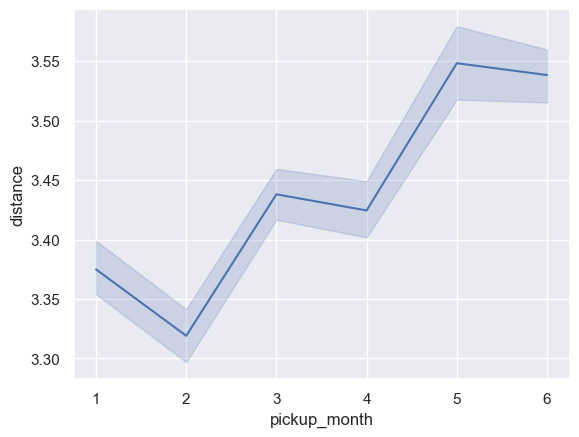

In [225]:
#Distance per month
sns.lineplot(x='pickup_month',y='distance',data=data)
#This graph gives more evidence for above inference of seasonal effect in travelling duration

<Axes: xlabel='passenger_count', ylabel='distance'>

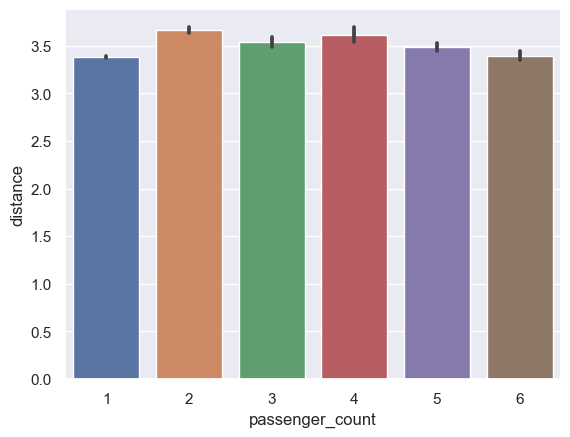

In [218]:
#distance vs passenger count
sns.barplot(x='passenger_count',y='distance',data=data)
#from the graph we understand that all passenger counts travel similar distance

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

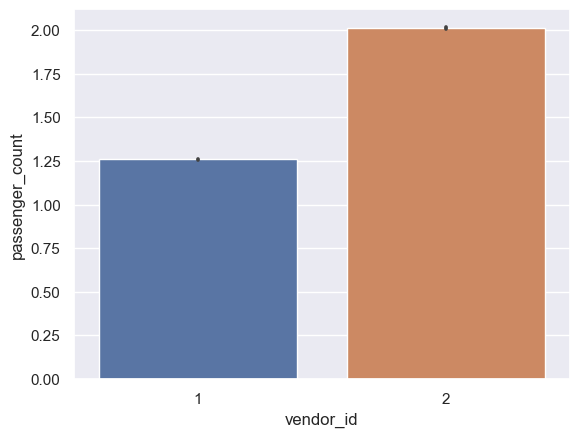

In [226]:
#Passenger Count and Vendor id
sns.barplot(y='passenger_count',x='vendor_id',data=data)
#This graph shows vendor 1 carries less no of passengers than vendor 2

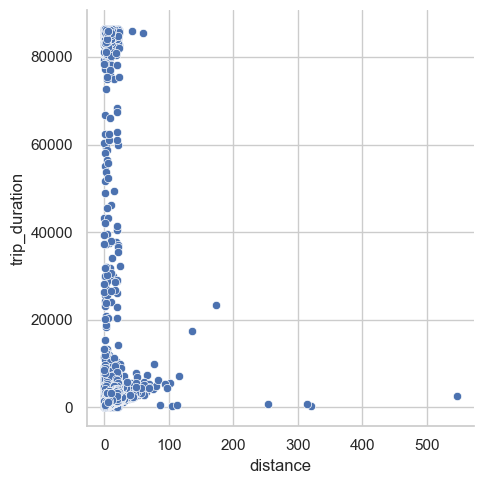

In [97]:
#Trip Duration and Distance
sns.relplot(x='distance',y='trip_duration',data=data)
#in this graph we see even when distance is 0 duration is quiet high indicating either dropoff duration is not recorded properly
#or passenger may cancelled the trip and for time duration 0 and distance recorded is max can be ignored as outlier

In [99]:
numerical= data.select_dtypes(include=['int64','float64'])[:]
numerical.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,pickup_weekday
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,16,16,2,2,1.199074,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,23,23,3,3,4.129117,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,17,18,2,2,7.250763,6
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,9,10,1,1,2.361101,1
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,6,6,2,2,4.328540,2


In [100]:
numerical.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,pickup_weekday
vendor_id,1.000000,0.286464,0.008231,0.003612,0.002258,0.005399,0.035209,0.009778,0.009712,-0.005364,-0.005338,0.007673,0.000784
passenger_count,0.286464,1.000000,0.001175,-0.004851,-0.000010,-0.004000,0.016513,0.009829,0.009195,-0.001530,-0.001546,0.010017,0.025786
pickup_longitude,0.008231,0.001175,1.000000,0.043517,0.784192,0.119191,0.041572,0.010748,0.011154,0.004027,0.004080,0.263422,-0.016058
pickup_latitude,0.003612,-0.004851,0.043517,1.000000,0.130874,0.522840,-0.048202,0.012061,0.019189,-0.000646,-0.000720,-0.300427,-0.032043
dropoff_longitude,0.002258,-0.000010,0.784192,0.130874,1.000000,0.160787,0.025528,-0.022076,-0.023244,0.003994,0.004033,0.158486,-0.001600
dropoff_latitude,0.005399,-0.004000,0.119191,0.522840,0.160787,1.000000,-0.035738,0.014287,0.018205,-0.000703,-0.000744,-0.183267,-0.022007
trip_duration,0.035209,0.016513,0.041572,-0.048202,0.025528,-0.035738,1.000000,0.005483,0.004076,0.012860,0.013796,0.163412,-0.001945
pickup_hour,0.009778,0.009829,0.010748,0.012061,-0.022076,0.014287,0.005483,1.000000,0.934587,-0.003318,-0.003061,-0.017847,-0.082068
dropoff_hour,0.009712,0.009195,0.011154,0.019189,-0.023244,0.018205,0.004076,0.934587,1.000000,-0.004026,-0.004398,-0.022963,-0.085753
pickup_month,-0.005364,-0.001530,0.004027,-0.000646,0.003994,-0.000703,0.012860,-0.003318,-0.004026,1.000000,0.999937,0.017291,-0.013624


In [101]:
#correlation matrix
c=numerical.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
so=pd.DataFrame(so,columns=['Pearson Correlation'])

In [240]:
so[so['Pearson Correlation']<1].head(10)

,,Pearson Correlation
dropoff_month,pickup_month,0.999937
pickup_month,dropoff_month,0.999937
dropoff_hour,pickup_hour,0.934586
pickup_hour,dropoff_hour,0.934586
dropoff_longitude,pickup_longitude,0.780639
pickup_longitude,dropoff_longitude,0.780639
pickup_latitude,dropoff_latitude,0.479290
dropoff_latitude,pickup_latitude,0.479290
vendor_id,passenger_count,0.286461
passenger_count,vendor_id,0.286461


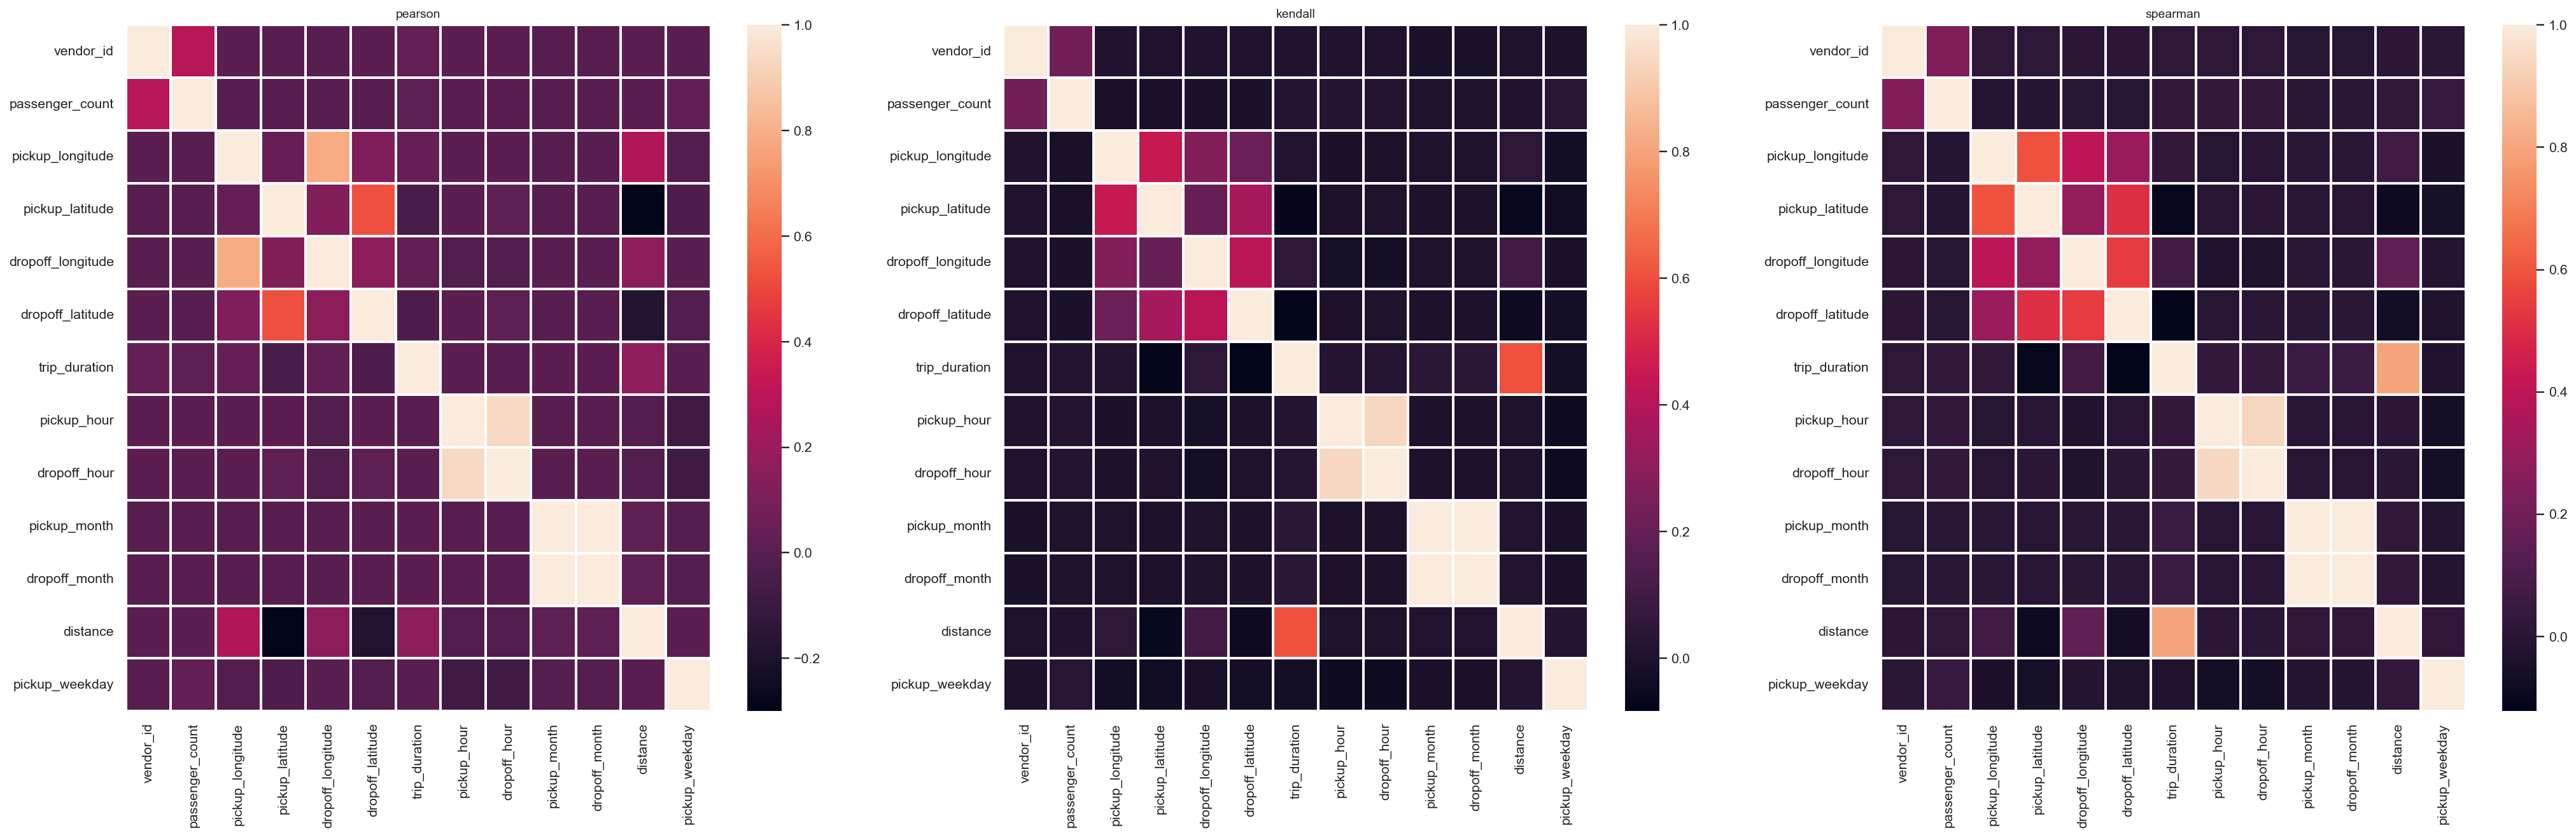

In [102]:
plt.figure(figsize=(36,10),dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation=numerical.dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=10)
#from the graph we understand there is a positive correlation between trip duration and distance which is understandable

# Multivariate analysis

In [254]:
data.pivot_table('trip_duration', ['vendor_id', 'passenger_count'], 'pickup_day', aggfunc='sum')
#from the table we understand that vendor 1 with more than 5 passengers have lesser duration of trip than other days generally
#also very worse duration on sunday and tuesday.

pickup_day                   Friday    Monday  Saturday    Sunday  Thursday  \
vendor_id passenger_count                                                     
1         1                35508090  28318311  28179176  24894402  37124742   
          2                 6835761   4885130   7844495   6431970   6061886   
          3                 1649104   1135811   2190010   1765211   1401350   
          4                  930687    631352   1361183    984497    680026   
          5                   40307     10014     31697     24099     34805   
          6                   14684     12631     16383      7988     11252   
2         1                40082120  29943144  36540956  32582848  40097159   
          2                10169770   7387449   9351545   8261269   9209460   
          3                 3109964   2290826   3304515   2291286   3474331   
          4                 1497777   1129378   1179686   1129698   1339442   
          5                 6784053   5014994   6755077   5597967   6675480   
          6                 4003573   3169749   4011830   3412075   3829515   

pickup_day                  Tuesday  Wednesday  
vendor_id passenger_count                       
1         1                32871855   35449351  
          2                 5072292    5635817  
          3                 1184664    1248946  
          4                  532622     641895  
          5                   14860       5613  
          6                    5893      10323  
2         1                35447382   37768677  
          2                 8706957    8762084  
          3                 2660598    2771696  
          4                 1076571    1129767  
          5                 5523915    5734011  
          6                 4247269    3380950

In [104]:
distance = pd.cut(data['distance'], [0, 250, 500, 1000])
data.pivot_table('trip_duration', [ 'vendor_id',distance], 'pickup_timezone', aggfunc='sum')
#from the table we understand that trip occurs mostly distance between 0-250km and longer trips occur rarely for both vendors.

pickup_timezone        Afternoon   Evening  Late Night   Morning  \
vendor_id distance                                                 
1         (0, 250]      46251606  46601933    55272608  17432627   
          (250, 500]           0       875           0         0   
          (500, 1000]       2515         0           0         0   
2         (0, 250]      64129854  67716651    85156368  23583109   
          (250, 500]           0       804           0         0   
          (500, 1000]          0         0           0         0   

pickup_timezone        Morning-Peakhours     Night  
vendor_id distance                                  
1         (0, 250]              52019791  63818418  
          (250, 500]                   0       282  
          (500, 1000]                  0         0  
2         (0, 250]              74336197  94678939  
          (250, 500]                   0         0  
          (500, 1000]                  0         0

In [264]:
day_interval = pd.qcut(data['pickup_hour'], 3)
data.pivot_table('trip_duration', [ 'vendor_id','pickup_month'], ['store_and_fwd_flag',day_interval], aggfunc='sum')
#we can clearly see vendor 2 doesnt involve in any trip when the vehicle didnt have any connection to the server 

store_and_fwd_flag                  N                            \
pickup_hour            (-0.001, 11.0] (11.0, 18.0] (18.0, 23.0]   
vendor_id pickup_month                                            
1         1                  14396231     15719631     10412061   
          2                  14478546     17005480     11333486   
          3                  16271334     18513459     12771306   
          4                  16603950     18689082     13281201   
          5                  17098239     19918112     12929611   
          6                  16607327     18796183     12442793   
2         1                  22611131     23044823     16974189   
          2                  21952642     24358241     16168836   
          3                  24382403     27989208     19207215   
          4                  23955662     27732127     20442611   
          5                  24465825     29233269     19309545   
          6                  23939849     26787791     18281446   

store_and_fwd_flag                  Y                            
pickup_hour            (-0.001, 11.0] (11.0, 18.0] (18.0, 23.0]  
vendor_id pickup_month                                           
1         1                    211752       320630       156797  
          2                    200551       313000       123431  
          3                    238654       304010       160812  
          4                    238457       411951       171873  
          5                    243631       338929       166036  
          6                    239991       374875       207773  
2         1                         0            0            0  
          2                         0            0            0  
          3                         0            0            0  
          4                         0            0            0  
          5                         0            0            0  
          6                         0            0            0

In [262]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timezone',
       'dropoff_timezone', 'distance'],
      dtype='object')

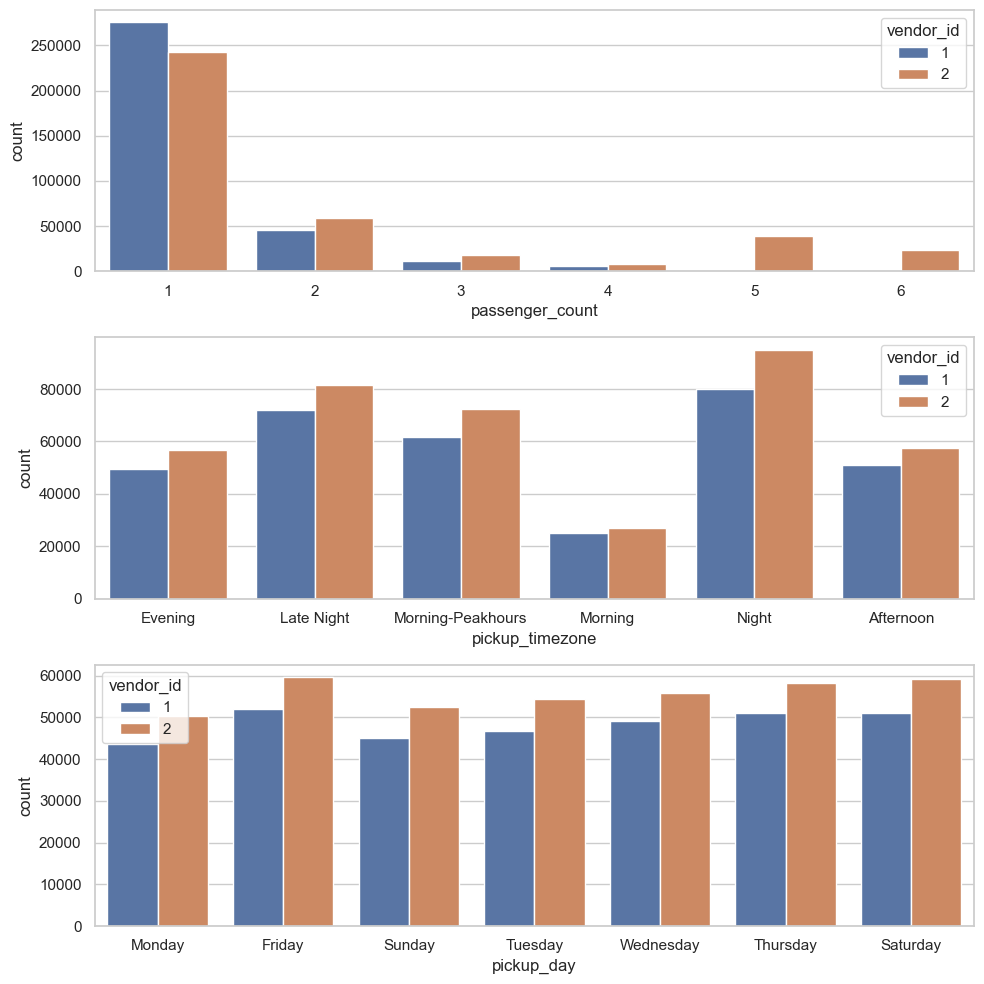

In [84]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))


variables = ['vendor_id']
grouped_variables = ['passenger_count', 'pickup_timezone','pickup_day']


for i, variable in enumerate(grouped_variables):
    plt.subplot(3, 1, i+1)
    sns.countplot(data=data, x=variable, hue='vendor_id')

plt.tight_layout()
plt.show()

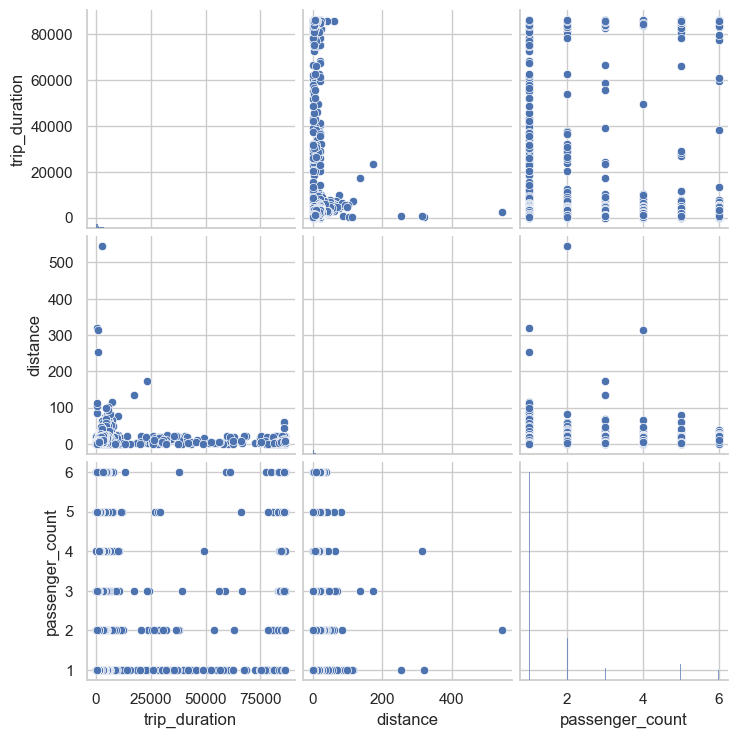

In [105]:
#pairplot for 3 categorical variables
variables = ['trip_duration', 'distance', 'passenger_count']
sns.pairplot(data[variables])
plt.show()

In [42]:
#T-Test
import scipy.stats as stats

sample = data['trip_duration'].sample(n=1000, random_state=42)

# Hypothesis test (one-sample t-test)
# Null hypothesis: The mean trip duration is equal to 24000 seconds
# Alternative hypothesis: The mean trip duration is different from the specified value
null_value = 24000

t_statistic, p_value = stats.ttest_1samp(sample, null_value)


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis")
    print("The trip duration is is not equal to 24000")
else:
    print("Fail to reject the null hypothesis")


print("t-statistic:", t_statistic)
print("p-value:", p_value)

#from the

Reject the null hypothesis
The trip duration is is not equal to 24000
t-statistic: -187.90551843794628
p-value: 0.0


In [47]:
# Hypothesis test (one-sample z-test)
# Null hypothesis: The mean trip duration is equal to 44000 seconds
# Alternative hypothesis: The mean trip duration is different from the specified value

import statsmodels.api as sm

null_value = 24000


sample_mean = sample.mean()
sample_std = sample.std()


ztest, p_value = sm.stats.ztest(sample, value=null_value)


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


print("z-statistic:", ztest)
print("p-value:", p_value)

Reject the null hypothesis
z-statistic: -187.90551843794628
p-value: 0.0


In [56]:
# Hypothesis test (two-sample z-test)
# Null hypothesis: The means of both samples are equal
# Alternative hypothesis: The means of both samples are different

sample1 = data['trip_duration'].sample(n=1000, random_state=42)
sample2 = data['distance'].sample(n=1000, random_state=42)



ztest, p_value = sm.stats.ztest(sample1, sample2)


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis since the  means of trip duration and distance are different in the population.")
else:
    print("Fail to reject the null hypothesis since the means of trip duration and distance are equal in the population")


print("z-statistic:", ztest)
print("p-value:", p_value)

Reject the null hypothesis since the  means of trip duration and distance are different in the population.
z-statistic: 8.471819939515811
p-value: 2.4158838131849526e-17


In [57]:
    # Chi-squared test

    contingency_table = pd.crosstab(data['vendor_id'], data['store_and_fwd_flag'])

    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis")
        print("There is an association between 'vendor_id' and 'store_and_fwd_flag'. The variables are dependent.")
        
    else:
        print("Fail to reject the null hypothesis")
        print(" There is no association between 'vendor_id' and 'store_and_fwd_flag'. The variables are independent.")

    print("Chi-squared statistic:", chi2_stat)
    print("p-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:\n", expected)

Reject the null hypothesis
There is an association between 'vendor_id' and 'store_and_fwd_flag'. The variables are dependent.
Chi-squared statistic: 4677.22799868979
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[336944.97441059   1876.02558941]
 [388303.02558941   2161.97441059]]


In [53]:
data.dtypes


id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timezone               object
dropoff_timezone              object
distance                     float64
dtype: object